<a href="https://colab.research.google.com/github/zzaeyun/ESAA23_1/blob/main/%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_562to579.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CHAP09 추천 시스템**

##**01 추천 시스템의 개요와 배경**
###**추천 시스템의 개요**
**추천 시스템(Recommendations)**
- 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공하여 사이트에 오래머무르도록 노력
  - 추천 엔진으로 많은 수익을 올릴 수 있음
  - 추천 엔진의 고도화에 큰 비용과 노력
- 하나의 콘텐츠를 선택했을 때 선택된 콘텐츠와 연관된 추천 콘텐츠가 얼마나 사용자의 관심을 끌고 개인에게 맞춘 콘텐츠를 추천했는지는 그 사이트의 평판을 좌우하는 요소

<br>

**온라인 스토어의 필수 요소, 추천 시스템**
- 전자상거래 업체나 온라인 콘텐츠 제공 업체는 너무 많은 상품을 가짐
  - 다양한 상품 이미지와 번잡한 카테고리, 메뉴 구성 등으로 사용자에게 부정적인 이미지가 강해져 매출 감소
  - **사용자가 상품을 고를 때 압박감을 덜어주고 원하는 것이 무엇인지 빠르게 찾아냄**

<br>

추천 시스템을 구축할 때 사용하는 사용자의 데이터 예시
- 사용자가 어떤 상품을 구매했는가?
- 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
- 사용자가 평가한 영화 평점은? 제품 평가는?
- 사용자가 스스로 작성한 자신의 취향은?
- 사용자가 무엇을 클릭했는가?

<br>

이런 데이터를 기반으로 추천시스템은 친숙한 문구로 사용자가 상품을 구매하도록 유혹 

<br>

**추천 시스템의 유형**
1. 콘텐츠 기반 필터링 (Content based Filtering)
2. 협업 필터링 (Collaborative Filtering)
  - 최근접 이웃(Nearest Neighbor) 협업 필터링
  - 잠재 요인(Latent Factor) 협업 필터링

- 초창기에는 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링이 주로 사용
- 넷플릭스 추천 시스템 경연 대회에서 행렬 분해(Matrix Factorization) 기법을 이용한 잠재 요인 협업 필터링 방식이 우승 -> 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 방식 사용
- 개인화 특성을 좀 더 강화하기 위해서 하이브리드 형식으로 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 많음


##**02 콘텐츠 기반 필터링 추천 시스템**
사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천

- 예시
컨택트: 8점, 프로메테우스:9점 -> 두 영화의 장르, 감독, 출연 배우, 키워드 등의 콘텐츠를 감안해 이와 유사한 영화를 추천 -> 블래이드 러너2049





##**03 최근접 이웃 협업 필터링**
친구들에게 물어보는 것과 유사한 방식으로 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것

<br>

협업 필터링의 주요 목표
- 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터를 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)

<br>

최근접 이웃 방식, 잠재 요인 방식
- 두 방식 모두 사용자-아이템 평점 행렬 데이터에만 의지
- 행: 개별 사용자
- 열: 개별 아이템
  - 판다스의 pivot_table()과 같은 함수를 이용해 행과 열을 맞추어 평점 행렬 형태로 변경 

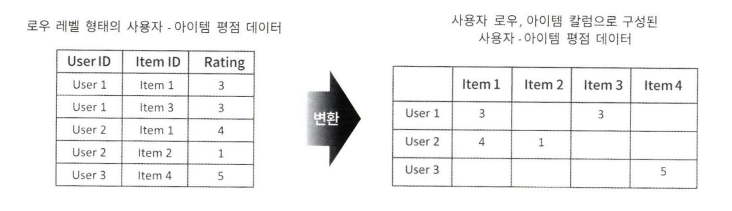

- 사용자-아이템 평점 행렬은 다차원 행렬, 희소행렬(Sparse Matrix)

<br>

최근접 이웃 협업 필터링 = 메모리(Memory) 협업 필터링
- 사용자 기반(User-User): 당신과 비슷한 고객들이 다음 상품을 구매했습니다
  - 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 TOP-N 사용자가 좋아하는 아이템을 추천하는 방식
  - 특정 사용자와 타 사용자 간의 유사도(Similarity)를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이템을 추천

- 아이템 기반(Item-Item): 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다
  - **아이템이 가지는 속성과는 상관 없이** 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천하는 기준이 됨
  - 아이템 기반 최근접 이웃 방식의 기반 데이터 세트는 행이 개별 아이템, 열이 개별 사용자: (사용자 기반 최근접 이웃 데이터 세트와 반대)

<br>

일반적으로 사용자 기반보다는 아이템 기반 협업 필터링의 정확도가 더 높음
- 비슷한 상품을 좋아한다고 해서 취향이 비슷하다고 판단하기 어려운 경우가 많음
- 텍스트 분석에서 소개된 유사도 측정 방법인 코사인 유사도는 추천 시스템의 유사도 측정에 가장 많이 적용
  - 추천 시스템에 사용되는 데이터는 피처 벡터화된 텍스트 데이터와 동일하게 다차원 희소 행렬이라는 특징이 있으므로 유사도 측정을 위해 주로 코사인 유사도 이용
  

##**04 잠재 요인 협업 필터링**

###**잠재 요인 협업 필터링의 이해**
- 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- **행렬 분해(Matrix Factorization)**: 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인을 추출
  1.  잠재요인을 기반으로 다차원 희소 행렬인 사용자-아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재 요인 행렬과 아이템-잠재 요인 행렬의 전치 행렬(즉, 잠재 요인-아이템 행렬)로 분해
  2. 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 생성
  3. 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성

###**행렬 분해의 이해**
다차원의 매트릭스를 저차원 매트릭스로 분해하는 기법
- SVD(Singular Vector Decomposition)
- NMF(Non-Negative Matrix Factorization)
- **Factorization(분해)**: 인수분해

###**확률적 경사 하강법을 이용한 행렬 분해**
- P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추해내는 것

<br>

확률적 경사 하강법(SGD) 절차
1. P와Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값을 계산
3. 이 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 업데이터
4. 만족할 만한 오류 값을 가질 때 까지 2,3번 작업을 반복하면서 P와 Q 값을 업데이터해 근사화

In [15]:
import numpy as np

R=np.array([[4, np.NaN, np.NaN, 2, np.NaN],
            [np.NaN, 5, np.NaN, 3, 1],
            [np.NaN, np.NaN, 3, 4, 4],
            [5, 2, 1, 2, np.NaN]])
num_users, num_items=R.shape
K=3

np.random.seed(1)
P=np.random.normal(scale=1./K, size=(num_users, K))
Q=np.random.normal(scale=1./K, size=(num_items, K))

get_rmse( ): 실제 R 행렬의 널이 아닌 행렬 값의 위치 인덱스를 추출해 이 인덱스에 있는 실제 R 행렬 값과 분해된 P, Q를 이용해 다시 조합된 예측 행렬 값의 RMSE 반환

In [16]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
  error=0
  full_pred_matrix=np.dot(P, Q.T)

  x_non_zero_ind=[non_zero[0] for non_zero in non_zeros]
  y_non_zero_ind=[non_zero[1] for non_zero in non_zeros]
  R_non_zeros=R[x_non_zero_ind, y_non_zero_ind]
  full_pred_matrix_non_zeros=full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
  mse=mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
  rmse=np.sqrt(mse)

  return rmse

In [17]:
non_zeros=[ (i, j, R[i, j]) for i in range(num_users) for j in range(num_items) if R[i, j]>0]
steps=1000
learning_rate=0.01
r_lambda=0.01

for step in range(steps):
  for i, j, r in non_zeros:
    eij=r-np.dot(P[i, :], Q[j, :].T)
    P[i, :]=P[i, :]+learning_rate*(eij*Q[j, :]-r_lambda*P[i, :])
    Q[j, :]=Q[j, :]+learning_rate*(eij*P[i, :]-r_lambda*Q[j, :])
  rmse=get_rmse(R, P, Q, non_zeros)
  if (step%50)==0:
    print('### iteration step: ', step, 'rmse: ', rmse)

### iteration step:  0 rmse:  3.2388050277987723
### iteration step:  50 rmse:  0.4876723101369648
### iteration step:  100 rmse:  0.1564340384819247
### iteration step:  150 rmse:  0.07455141311978046
### iteration step:  200 rmse:  0.04325226798579314
### iteration step:  250 rmse:  0.029248328780878973
### iteration step:  300 rmse:  0.022621116143829466
### iteration step:  350 rmse:  0.019493636196525135
### iteration step:  400 rmse:  0.018022719092132704
### iteration step:  450 rmse:  0.01731968595344266
### iteration step:  500 rmse:  0.016973657887570753
### iteration step:  550 rmse:  0.016796804595895633
### iteration step:  600 rmse:  0.01670132290188466
### iteration step:  650 rmse:  0.01664473691247669
### iteration step:  700 rmse:  0.016605910068210026
### iteration step:  750 rmse:  0.016574200475705
### iteration step:  800 rmse:  0.01654431582921597
### iteration step:  850 rmse:  0.01651375177473524
### iteration step:  900 rmse:  0.01648146573819501
### iteration

In [18]:
pred_matrix=np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
